<a href="https://colab.research.google.com/github/vikasharma005/linear_regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Linear regression from Sctrach using pyTorch**

Linear regression performs a regression task on a target variable based on independent variables in a given
data. It is a machine learning algorithm and is often used to find the relationship between the target and
independent variables.
The **Simple Linear Regression** model is to predict the target variable using one independent variable.
When one variable/column in a dataset is not sufficient to create a good model and make more accurate
predictions, we’ll use a multiple linear regression model instead of a simple linear regression model
The line equation for the multiple linear regression model is: 

```
 y = w1x1 + w2x2 + ... + wnxn + b
```

We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the
average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:

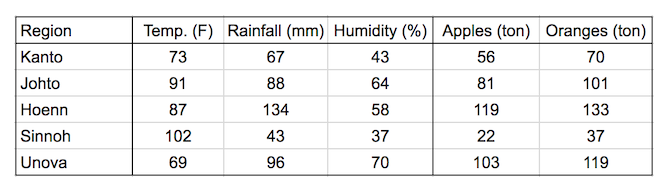

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables,
offset by some constant, known as a bias :


```
yield_apple = w11 * temp + w12 * rainfall + w13 * humidity + b1
yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2

```



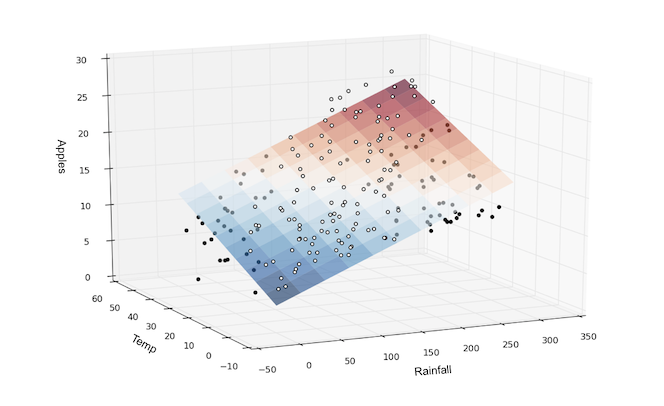

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.or

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.or


In [2]:
import torch
import numpy as np

**Training Data**

In [5]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                    [91, 88, 64],
                    [87, 134, 58],
                    [102, 43, 37],
                    [69, 96, 70]], dtype='float32')

In [6]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [7]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


**Weight and baises**

The weights and biases (w11, w12,... w23, b1 & b2) can also be represented as matrices, initialized as
random values. The first row of w and the first element of b are used to predict the first target variable, i.e.,
yield of apples, and similarly, the second for oranges.


In [8]:
w = torch.randn(2,3, requires_grad= True)
b = torch.randn(2, requires_grad= True)
print(w,'\n',b)

tensor([[ 0.5651,  0.1973, -0.2482],
        [-1.4253,  0.7591, -0.5888]], requires_grad=True) 
 tensor([-0.5225,  0.6785], requires_grad=True)


***torch.randn*** creates a tensor with the given shape, with elements picked randomly from a normal
distribution with mean 0 and standard deviation 1.
Our model is simply a function that performs a matrix multiplication of the ***inputs*** and the weights*** w***
(transposed) and adds the bias ***b*** (replicated for each observation).
 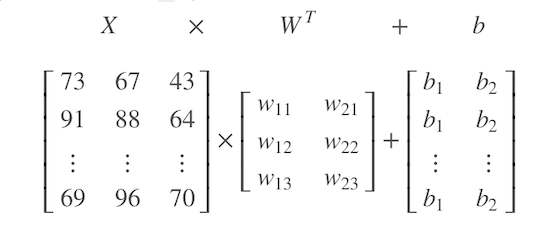

In [9]:
def model(x):
 return x @ w.t() + b

***@*** represents matrix multiplication in PyTorch, and the  ***.t*** method returns the transpose of a tensor.
The matrix obtained by passing the input data into the model is a set of predictions for the target variables

In [10]:
preds = model(inputs)

In [11]:
preds

tensor([[  43.2785,  -77.8254],
        [  52.3823,  -99.9034],
        [  60.6856,  -55.7490],
        [  56.4212, -133.8471],
        [  40.0390,  -66.0053]], grad_fn=<AddBackward0>)

In [12]:
# compare preds with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


**Loss function**

Before we improve our model, we need a way to evaluate how well our model is performing. We can
compare the model's predictions with the actual targets using the following method:

* Calculate the difference between the two matrices ( ***preds*** and ***targets*** ).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.





The result is a single number, known as the **mean squared error** (MSE).

In [13]:
# mean squared error loss
def mse(t1,t2):
 diff = t1-t2
 return torch.sum(diff*diff)/diff.numel()

***torch.sum*** returns the sum of all the elements in a tensor. The  ***.numel*** method of a tensor returns the
number of elements in a tensor. Let's compute the mean squared error for the current predictions of our
model

In [14]:
loss = mse(preds,targets)


In [15]:
print(loss)

tensor(17078.6738, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual
target by the square root of the loss. And that’s pretty bad, considering the numbers we are trying to predict
are themselves in the range 50–200. The result is called the loss because it indicates how bad the model is at
predicting the target variables. It represents information loss in the model: the lower the loss, the better the
model. 

**Compute gradients**

With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and
biases because they have ***requires_grad*** set to ***True*** . We'll see how this is useful in just a moment.

In [16]:
loss.backward()

In [17]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.5651,  0.1973, -0.2482],
        [-1.4253,  0.7591, -0.5888]], requires_grad=True)
tensor([[ -1887.9165,  -3149.7949,  -1778.8962],
        [-15137.2812, -15596.6240,  -9886.6953]])


**Adjust weights and biases to reduce the loss**

The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights
where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will
look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of
change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.
If a gradient element is **positive**:
* **increasing** the weight element's value slightly will** increase** the loss
* **decreasing** the weight element's value slightly will **decrease** the loss

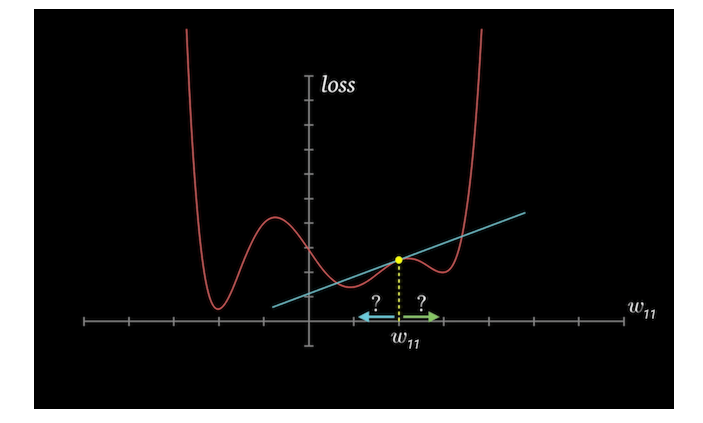

If a gradient element is **negative**:
* **increasing** the weight element's value slightly will **decreas**e the loss
* **decreasing** the weight element's value slightly will **increase** the loss

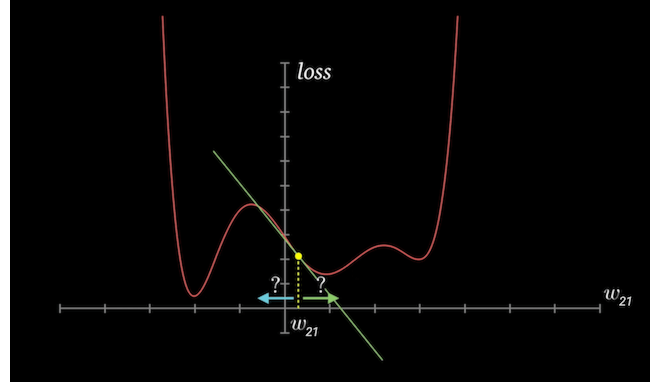

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss
w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll
use to improve our model (by descending along the gradient).
We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t.
that element to reduce the loss slightly.


In [18]:
w
w.grad

tensor([[ -1887.9165,  -3149.7949,  -1778.8962],
        [-15137.2812, -15596.6240,  -9886.6953]])

We multiply the gradients with a very small number (*** 10^-5*** in this case) to ensure that we don't modify the
weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a
giant leap. This number is called the learning rate of the algorithm. 
We use ***torch.no_grad*** to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while
updating the weights and biases.


In [19]:
with torch.no_grad():
 w -= w.grad * 1e-5
 b -= b.grad * 1e-5

In [20]:
# Let's verify that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(17078.6738, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the  ***.zero_() ***method. We need to do this
because PyTorch accumulates gradients. Otherwise, the next time we invoke ***.backward*** on the loss, the
new gradient values are added to the existing gradients, which may lead to unexpected results. 

In [21]:
w.grad.zero_()
b.grad.zero_()
print(w.grad,'\n',b.grad)


tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([0., 0.])


**Train the model using gradient descent**

As seen above, we reduce the loss and improve our model using the gradient descent optimization
algorithm. Thus, we can train the model using the following steps:
1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

Let's implement the above step by step.


In [22]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[  47.5322,  -52.0724],
        [  58.0109,  -66.0742],
        [  67.5808,  -15.9441],
        [  60.3597, -108.0407],
        [  45.6109,  -33.6654]], grad_fn=<AddBackward0>)


In [23]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(11735.2432, grad_fn=<DivBackward0>)


In [24]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)


tensor([[ -1446.1562,  -2668.0874,  -1483.1311],
        [-12480.2480, -12746.5029,  -8126.7402]])
tensor([ -20.3811, -147.1593])


In [25]:
# Adjust weights & reset gradients
with torch.no_grad():
      w -= w.grad * 1e-5
      b -= b.grad * 1e-5
      w.grad.zero_()
      b.grad.zero_()


In [26]:
print(w)
print(b)

tensor([[ 0.5985,  0.2555, -0.2155],
        [-1.1492,  1.0426, -0.4086]], requires_grad=True)
tensor([-0.5220,  0.6818], requires_grad=True)


In [27]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)


tensor(8131.8369, grad_fn=<DivBackward0>)


**Train for multiple epochs**

To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients
multiple times. Each iteration is called an epoch. Let's train the model for 100 epochs.


In [28]:

# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()


In [29]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(245.9593, grad_fn=<DivBackward0>)


In [30]:
# Predictions
preds


tensor([[ 62.7226,  68.3406],
        [ 81.0096,  91.5225],
        [112.4800, 156.9299],
        [ 53.3927,  24.1160],
        [ 80.8786, 110.8874]], grad_fn=<AddBackward0>)

In [31]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

**Linear regression using PyTorch built-ins**

We've implemented linear regression & gradient descent model using some basic tensor operations.
However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and
classes to make it easy to create and train models with just a few lines of code.
Let's begin by importing the ***torch.nn*** package from PyTorch, which contains utility classes for building
neural networks. 

In [32]:
from torch import nn

In [33]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
 [91, 88, 64],
 [87, 134, 58],
 [102, 43, 37],
 [69, 96, 70],
 [74, 66, 43],
 [91, 87, 65],
 [88, 134, 59],
 [101, 44, 37],
 [68, 96, 71],
 [73, 66, 44],
 [92, 87, 64],
 [87, 135, 57],
 [103, 43, 36],
 [68, 97, 70]],
 dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70],
 [81, 101],
 [119, 133],
 [22, 37],
 [103, 119],
 [57, 69],
 [80, 102],
 [118, 132],
 [21, 38],
 [104, 118],
 [57, 69],
 [82, 100],
 [118, 134],
 [20, 38],
 [102, 120]],
 dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

**Dataset and DataLoader**

We'll create a ***TensorDataset*** , which allows access to rows from ***inputs*** and ***targets*** as tuples, and
provides standard APIs for working with many different types of datasets in PyTorch.


In [36]:
from torch.utils.data import TensorDataset

In [35]:
train_ds = TensorDataset(inputs,targets)

In [37]:
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

The ***TensorDataset*** allows us to access a small section of the training data using the array indexing
notation ( ***[0:3]*** in the above code). It returns a tuple with two elements. The first element contains the
input variables for the selected rows, and the second contains the targets.

We'll also create a DataLoader , which can split the data into batches of a predefined size while training. It
also provides other utilities like shuffling and random sampling of the data.

In [38]:
from torch.utils.data import DataLoader

In [39]:
# Define a DataLoader
batch_size = 5
train_dl = DataLoader(train_ds,batch_size,shuffle= True)

We can use the data loader in a ***for*** loop. Let's look at an example.

In [ ]:
for xb, yb in train_dl:
      print(xb)
      print(yb)
      break

In each iteration, the data loader returns one batch of data with the given batch size. If ***shuffle*** is set to
***True*** , it shuffles the training data before creating batches. Shuffling helps randomize the input to the
optimization algorithm, leading to a faster reduction in the loss.


**nn.Linear**

Instead of initializing the weights & biases manually, we can define the model using the ***nn.Linear*** class
from PyTorch, which does it automatically.


In [40]:
model = nn.Linear(3,2)
print(model.weight,'\n',model.bias)

Parameter containing:
tensor([[ 0.3080, -0.3529,  0.2765],
        [-0.5585,  0.5209,  0.3386]], requires_grad=True) 
 Parameter containing:
tensor([ 0.2147, -0.0541], requires_grad=True)


PyTorch models also have a helpful ***.parameters ***method, which returns a list containing all the weights
and bias matrices present in the model. For our linear regression model, we have one weight matrix and one
bias matrix.


In [42]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3080, -0.3529,  0.2765],
         [-0.5585,  0.5209,  0.3386]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2147, -0.0541], requires_grad=True)]

In [43]:
# Generate predictions
preds = model(inputs)
preds


tensor([[ 10.9378,   8.6364],
        [ 14.8755,  16.6329],
        [ -4.2499,  40.7958],
        [ 26.6798, -22.0916],
        [  6.9361,  35.1176],
        [ 11.5986,   7.5571],
        [ 15.5050,  16.4506],
        [ -3.6654,  40.5759],
        [ 26.0189, -21.0123],
        [  6.9046,  36.0147],
        [ 11.5672,   8.4541],
        [ 15.5364,  15.5536],
        [ -4.8793,  40.9781],
        [ 26.7112, -22.9887],
        [  6.2752,  36.1970]], grad_fn=<AddmmBackward0>)

**Loss Function**

Instead of defining a loss function manually, we can use the built-in loss function ***mse_loss*** .


In [44]:
# importing nn.Functional
import torch.nn.functional as F

The ***nn.functional*** package contains many useful loss functions and several other utilities

In [45]:
# Define a loss function
loss_fn = F.mse_loss

In [46]:
loss = loss_fn(model(inputs),targets)
loss

tensor(6062.3638, grad_fn=<MseLossBackward0>)

**Optimizer**

Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer
***optim.SGD*** . SGD is short for "stochastic gradient descent". The term stochastic indicates that samples are
selected in random batches instead of as a single group.


In [47]:
# Define Optimizer
opt = torch.optim.SGD(model.parameters(),lr= 1e-5)

Note that ***model.parameters()*** is passed as an argument to ***optim.SGD*** so that the optimizer knows
which matrices should be modified during the update step. Also, we can specify a learning rate that controls
the amount by which the parameters are modified.


**Train the model**

We are now ready to train the model. We'll follow the same process to implement gradient descent:
1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

The only change is that we'll work batches of data instead of processing the entire training data in every
iteration. Let's define a utility function ***fit*** that trains the model for a given number of epochs.


In [51]:
# Utility function to train model
def fit(model, loss_fn, num_epochs, opt, train_dl):
    # repeat for given no. of epoch
    for epoch in range(num_epochs):
      # train with batches
      for xb,yb in train_dl:
          # 1. Generate prediction
          preds = model(xb)
          # 2. calculate loss
          loss = loss_fn(preds,yb)
          # 3. compute gradients
          loss.backward()
          # 4. update the paramete using gradient
          opt.step()
          # 5. Reset the gradients to zero
          opt.zero_grad()

      # Print the progress
      if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Some things to note above:

* We use the data loader defined earlier to get batches of data for every iteration.
* Instead of updating parameters (weights and biases) manually, we use ***opt.step*** to perform the
update and ***opt.zero_grad*** to reset the gradients to zero.
* We've also added a log statement that prints the loss from the last batch of data for every 10th epoch
to track training progress. ***loss.item*** returns the actual value stored in the loss tensor.

Let's train the model for 100 epochs.


In [52]:
fit(model,loss_fn,100,opt,train_dl)

Epoch [10/100], Loss: 156.2363
Epoch [20/100], Loss: 448.4641
Epoch [30/100], Loss: 201.3883
Epoch [40/100], Loss: 74.6506
Epoch [50/100], Loss: 33.2723
Epoch [60/100], Loss: 34.8538
Epoch [70/100], Loss: 21.1369
Epoch [80/100], Loss: 45.1377
Epoch [90/100], Loss: 22.6332
Epoch [100/100], Loss: 14.5593


In [53]:
preds = model(inputs)

In [54]:
preds

tensor([[ 58.4281,  70.5683],
        [ 82.4903,  98.7860],
        [113.8992, 136.3208],
        [ 29.8407,  38.7647],
        [ 97.4972, 114.8660],
        [ 57.4415,  69.4560],
        [ 82.3628,  98.5634],
        [114.2684, 136.7497],
        [ 30.8273,  39.8770],
        [ 98.3563, 115.7556],
        [ 58.3006,  70.3456],
        [ 81.5037,  97.6737],
        [114.0267, 136.5435],
        [ 28.9816,  37.8750],
        [ 98.4837, 115.9783]], grad_fn=<AddmmBackward0>)

In [55]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have a trained a reasonably good model to predict
crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region.
We can use it to make predictions of crop yields for new regions by passing a batch containing a single row
of input.


In [56]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[55.5859, 67.2390]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.